In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/output/submission.csv


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split


In [3]:
train_df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test_df = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [4]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
Y_train_full = train_df['label']
X_train_full = train_df.drop(labels=['label'], axis=1)
Y_train_full.head()


0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [7]:
X_train_full.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# normalizing pixel values in X_train_full to 0 and 1 as it will be easier to train 

In [8]:
X_train_full = X_train_full / 255.0
test_df = test_df / 255.0

**Reshaping the data from N,784 to N,28,28,1 for CNN**

In [9]:
X_train_full = X_train_full.values.reshape(-1, 28, 28, 1)
X_test = test_df.values.reshape(-1, 28, 28, 1)

**One-Hot Encoding labels**

In [10]:
Y_train_full = keras.utils.to_categorical(Y_train_full, num_classes=10)

In [11]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train_full, Y_train_full, test_size=0.1, random_state=42)

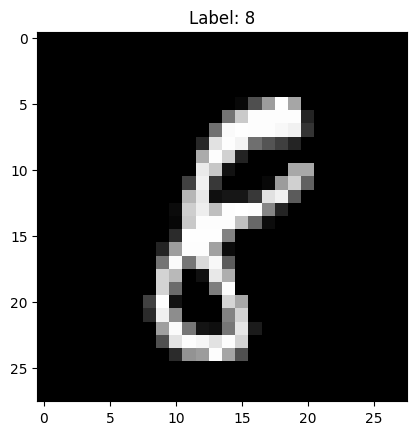

In [12]:
# Plot the first training image
plt.imshow(X_train[0][:,:,0], cmap='gray')
plt.title(f"Label: {np.argmax(Y_train[0])}")
plt.show()

# the reshape is working correctly

In [13]:
model = keras.Sequential([
    # Explicit Input Layer to fix the warning
    layers.Input(shape=(28, 28, 1)),

    # First Convolutional Block
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    # Second Convolutional Block
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    # Flatten and Dense Layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

2025-11-25 20:33:17.647488: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [14]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
history = model.fit(X_train, Y_train,
                    epochs=10, 
                    batch_size=64,
                    validation_data=(X_val, Y_val),
                    verbose=1)

Epoch 1/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - accuracy: 0.7470 - loss: 0.7581 - val_accuracy: 0.9683 - val_loss: 0.1041
Epoch 2/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.9558 - loss: 0.1387 - val_accuracy: 0.9798 - val_loss: 0.0648
Epoch 3/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 18s 31ms/step - accuracy: 0.9690 - loss: 0.1017 - val_accuracy: 0.9855 - val_loss: 0.0507
Epoch 4/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 18s 31ms/step - accuracy: 0.9737 - loss: 0.0852 - val_accuracy: 0.9857 - val_loss: 0.0394
Epoch 5/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.9787 - loss: 0.0696 - val_accuracy: 0.9869 - val_loss: 0.0419
Epoch 6/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.9799 - loss: 0.0658 - val_accuracy: 0.9876 - val_loss: 0.0349
Epoch 7/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.9821 - loss: 0.0577 - val_accuracy: 0.9898 - val_loss: 0.0319
Epoch 8/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.9830 - loss: 0.0528 - 

In [16]:
predictions = model.predict(X_test)

875/875 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step


In [17]:
results = np.argmax(predictions, axis=1)

In [18]:
submission = pd.DataFrame({
    "ImageId": range(1, len(results) + 1),
    "Label": results
})

In [19]:
submission.to_csv("submission.csv", index=False)